# Notebook Structure

1. Import necessary dependencies
2. Import the required dataset
3. Visualize different columns using QQ plot
4. How to interpret QQ plot



# 1. Import necessary dependencies

In [15]:
# libraries & dataset
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

sns.set_theme(style="darkgrid")

# 2. Import the required dataset

In [16]:
df = sns.load_dataset("iris")

In [17]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 3. Visualize different columns

### A. Drawing a simple QQ plot with default parameters

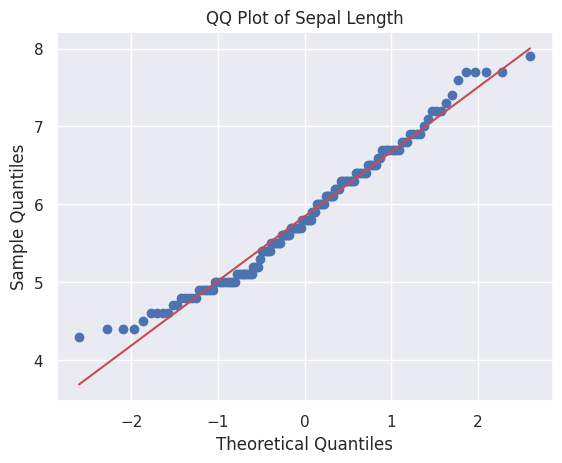

In [18]:
# Create the QQ plot
stats.probplot(df["sepal_length"], plot=plt)

plt.title("QQ Plot of Sepal Length")
plt.ylabel("Sample Quantiles")
plt.xlabel("Theoretical Quantiles")
plt.show()

### B. Improving the graph with different parameters

* Specify the data and the x-variable.
* Set the color of the points.
* Add a title and axis labels.

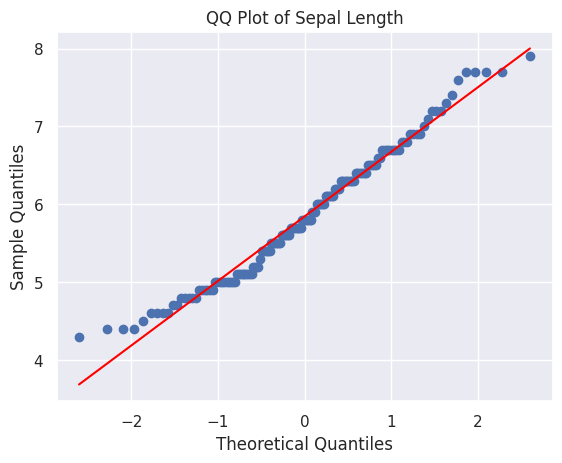

In [23]:
# Create the QQ plot
stats.probplot(
    df["sepal_length"],
    dist='norm',       # Distribution to compare with (default: 'norm' for normal)
    fit=True,        # Whether to fit the distribution parameters
    sparams=(),
    plot=plt,
    # Add other Matplotlib parameters as needed (e.g., alpha, color, marker)
)

# Set the color of the points using Matplotlib
plt.setp(plt.gca().lines[1], color='red') # Access the line object and set its color

plt.title("QQ Plot of Sepal Length")
plt.ylabel("Sample Quantiles")
plt.xlabel("Theoretical Quantiles")
plt.show()

### C. Visualize multiple QQ plot together

1. Define the columns to plot ( update based on your scenario )
2. Define the colors of each Strip plot ( update based on your choice/preference )
3. we created a 2 * 2 matrix with each figure as (14 , 10 ) , you can update each of them based on preference


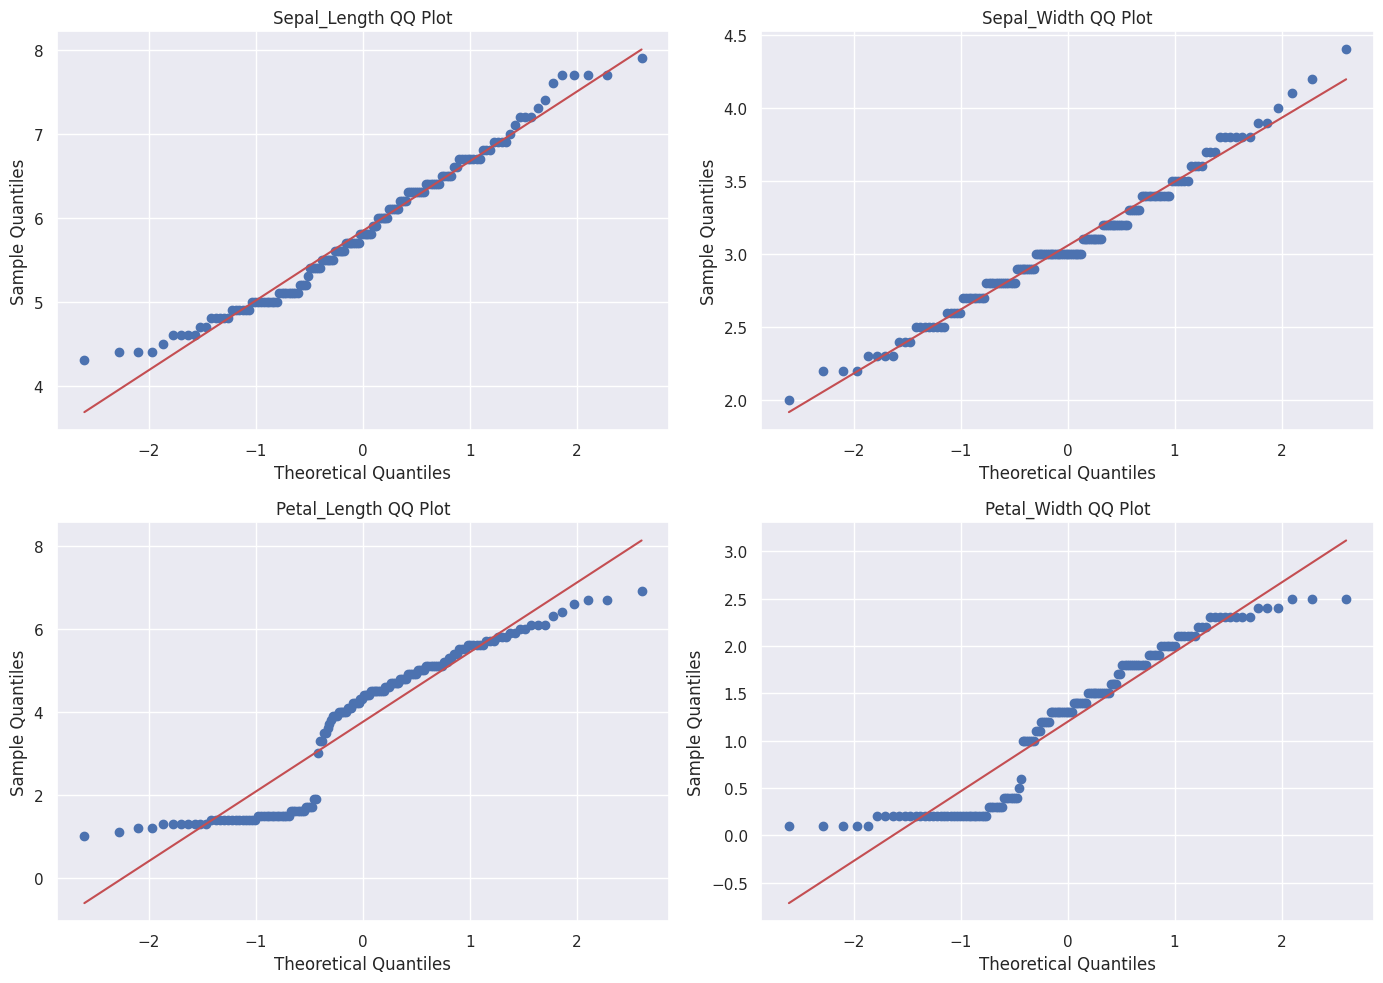

In [24]:
# Define the columns to plot
columns_to_plot = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Create a 2x2 subplot grid with a fixed figure size
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Iterate through the columns and plot each one in a separate subplot
for i, col in enumerate(columns_to_plot):
    # Determine the row and column for the current subplot
    row = i // 2
    col_num = i % 2

    # Select the appropriate subplot axis
    ax = axes[row, col_num]

    # Create the QQ plot
    stats.probplot(df[col], dist='norm', fit=True, plot=ax) #changed to ax

    # Set the title and labels for the subplot
    ax.set_title(f"{col.title()} QQ Plot")
    ax.set_ylabel("Sample Quantiles")
    ax.set_xlabel("Theoretical Quantiles")

# Adjust the layout to prevent overlapping titles/labels
plt.tight_layout()

# Display the plots
plt.show()

# 4. How to Interpret QQ plot :

Key Features to Look For

What it shows:

* A QQ plot (quantile-quantile plot) compares the quantiles of your sample data to the quantiles of a theoretical distribution (e.g., normal, exponential).
* If your data comes from the theoretical distribution, the points on the QQ plot will form a straight line.

Key Features to Look For:

* Straight Line: If the points fall closely along the straight line, it suggests that your data follows the theoretical distribution.
* Deviations from the Line: Deviations from the straight line indicate that your data deviates from the theoretical distribution.

Shape of Deviations:

* If the points form an S-shaped curve, it suggests that the tails of your data's distribution are thinner than the tails of the theoretical distribution.
* If the points are curved upwards at the ends, it suggests that the tails of your data's distribution are heavier than the tails of the theoretical distribution.
* Outliers: Outliers in your data will appear as points that deviate significantly from the straight line, especially at the ends of the plot.

In the context of normality:

* If you're comparing your data to a normal distribution (which is common), a QQ plot can help you assess whether your data is approximately normally distributed.
* Points falling close to the line suggest that the data is approximately normally distributed.
* Systematic deviations from the line suggest that the data is not normally distributed.

In summary, a QQ plot is a valuable tool for visually assessing how well your data conforms to a theoretical distribution.

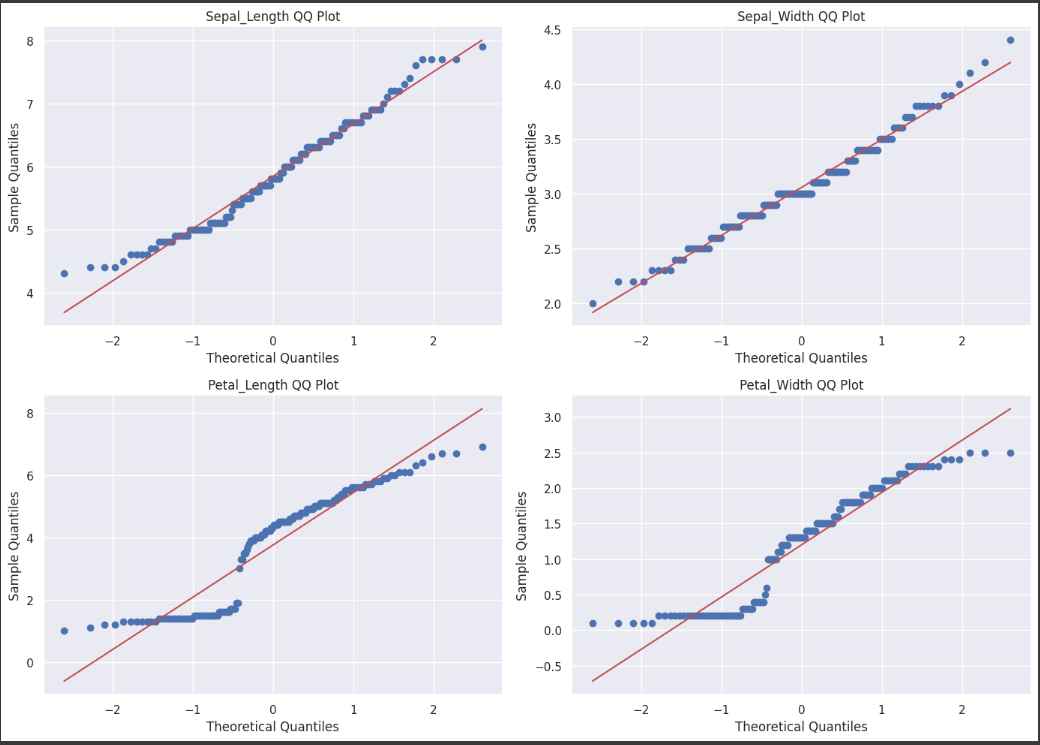

1. Sepal Length QQ Plot

* The points in the Sepal Length QQ Plot fall very close to the straight line.
* This suggests that the distribution of sepal lengths in the sample data is very close to a normal distribution.
* There are no significant deviations or patterns to indicate non-normality.

2. Sepal Width QQ Plot

* The points in the Sepal Width QQ Plot also fall very close to the straight line.
* This suggests that the distribution of sepal widths is also approximately normal.
* Similar to sepal length, there are no obvious deviations from normality.

3. Petal Length QQ Plot

* In the Petal Length QQ Plot, the points deviate slightly from the straight line, especially at the tails.
* The points form a slight S-shaped curve. This indicates that the tails of the petal length distribution are somewhat thinner than the tails of a normal distribution.
* Overall, the data is not perfectly normal, but the deviations are not extreme.

4. Petal Width QQ Plot

* The Petal Width QQ Plot shows some deviations from the straight line, particularly at both ends.
* The points at the lower end are below the line, and the points at the higher end are above the line, suggesting that the tails of the petal width distribution are heavier than the tails of a normal distribution.
* There is a more pronounced departure from normality compared to sepal length and sepal width.

In summary, based on the QQ plots:

* Sepal length and sepal width appear to be approximately normally distributed.
* Petal length shows slight deviations from normality, with thinner tails.
* Petal width exhibits a more noticeable departure from normality, with heavier tails.